In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Accuracy

In [2]:
# Read the classification report from file
with open('Data 1 Classification', 'r') as file:
    content = file.read()
    print(content)

# Alternatively, parse it into a DataFrame for easier analysis
def parse_classification_report(file_path):
    """Parse classification report into a pandas DataFrame"""
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extract data lines (skip header and footer)
    data = []
    for line in lines:
        if line.strip() and not line.startswith('Classification'):
            parts = line.split()
            if len(parts) >= 4 and parts[0] not in ['accuracy', 'macro', 'weighted', 'precision']:
                try:
                    # Regular class rows - try to convert to ensure it's data
                    label = parts[0]
                    precision = float(parts[1])
                    recall = float(parts[2])
                    f1_score = float(parts[3])
                    support = int(parts[4])
                    data.append([label, precision, recall, f1_score, support])
                except ValueError:
                    # Skip header lines or any non-numeric rows
                    continue
    
    # Create DataFrame
    df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    
    return df

# Parse the report
df = parse_classification_report('Data 1 Classification')

# Display the DataFrame
print("\nClassification Report as DataFrame:")
print(df)

# Show basic statistics
print("\n=== Summary Statistics ===")
print(f"Average Precision: {df['Precision'].mean():.4f}")
print(f"Average Recall: {df['Recall'].mean():.4f}")
print(f"Average F1-Score: {df['F1-Score'].mean():.4f}")
print(f"Total Support: {df['Support'].sum()}")

# Identify best and worst performing classes
print("\n=== Best Performing Classes (by F1-Score) ===")
print(df.nlargest(5, 'F1-Score')[['Class', 'F1-Score']])
print("\n=== Worst Performing Classes (by F1-Score) ===")
print(df.nsmallest(5, 'F1-Score')[['Class', 'F1-Score']])

FileNotFoundError: [Errno 2] No such file or directory: 'Data 1 Classification'

In [ ]:
from StatsFunctions import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    linear_regression_fit, 
    linear_regression_predict, 
    regression_analysis
)

1. PRECISION
--------------------------------------------------
Regression Analysis: Precision
R² Score:                 0.0095
Mean Squared Error (MSE): 0.006606
Root MSE (RMSE):          0.081278
Mean Absolute Error:      0.056097
MAPE:                     6.80%

Regression equation: Precision = -0.001020 * Class_Index + 0.927698

2. RECALL
--------------------------------------------------
Regression Analysis: Recall
R² Score:                 0.2185
Mean Squared Error (MSE): 0.002438
Root MSE (RMSE):          0.049377
Mean Absolute Error:      0.033192
MAPE:                     3.81%

Regression equation: Recall = -0.003352 * Class_Index + 0.949868

3. F1-SCORE
--------------------------------------------------
Regression Analysis: F1-Score
R² Score:                 0.1146
Mean Squared Error (MSE): 0.002781
Root MSE (RMSE):          0.052736
Mean Absolute Error:      0.036302
MAPE:                     4.21%

Regression equation: F1-Score = -0.002436 * Class_Index + 0.939815


SUMMAR

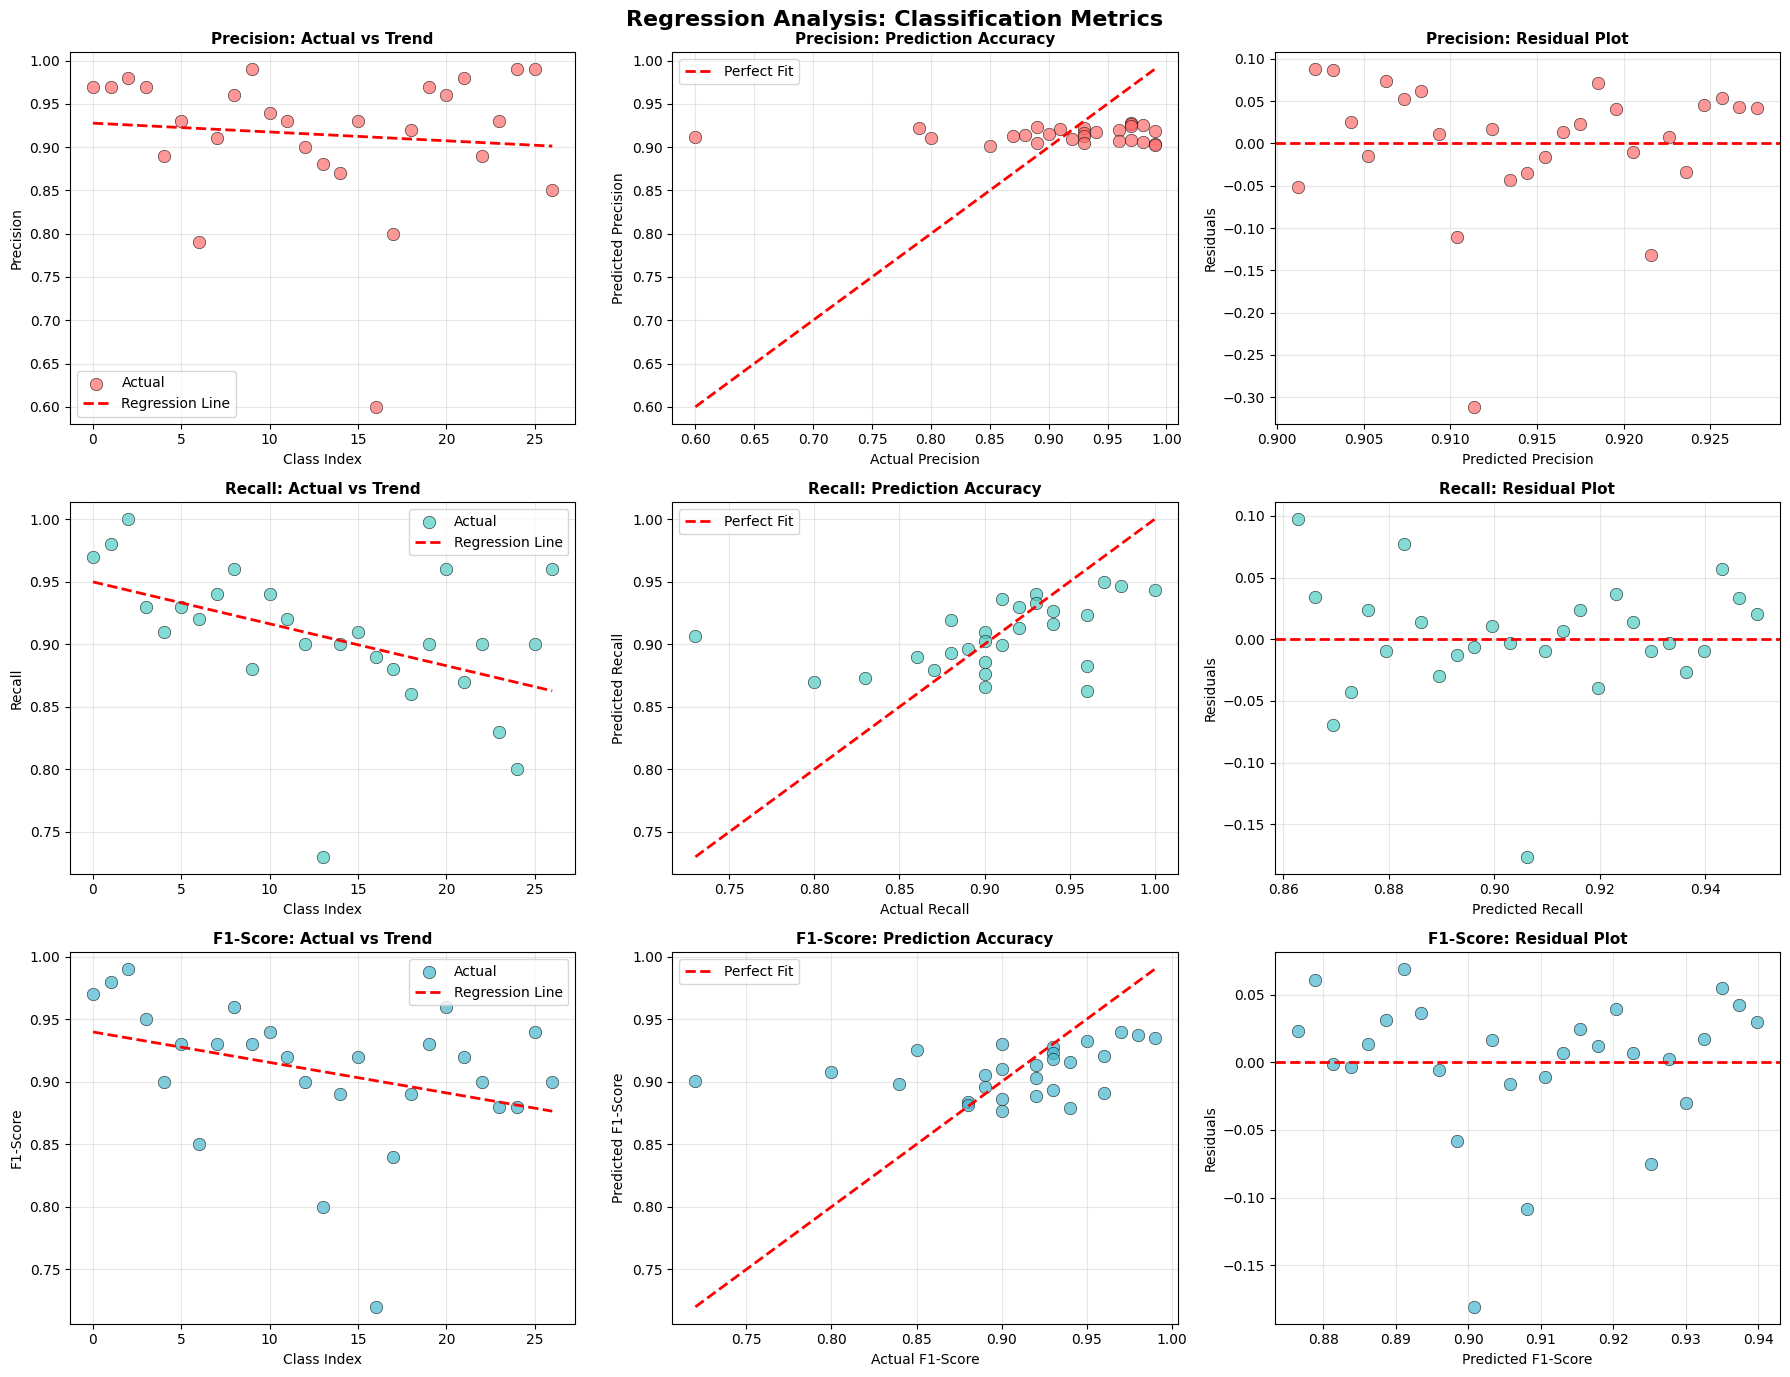

In [ ]:
# Parse the classification report
def parse_classification_report(file_path):
    """Parse classification report into a pandas DataFrame"""
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data = []
    for line in lines:
        if line.strip() and not line.startswith('Classification'):
            parts = line.split()
            if len(parts) >= 4 and parts[0] not in ['accuracy', 'macro', 'weighted', 'precision']:
                try:
                    label = parts[0]
                    precision = float(parts[1])
                    recall = float(parts[2])
                    f1_score = float(parts[3])
                    support = int(parts[4])
                    data.append([label, precision, recall, f1_score, support])
                except ValueError:
                    continue
    
    df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    return df

df = parse_classification_report('Data 1 Classification')

# Create index as predictor (class position)
X = np.arange(len(df)).astype(float)

# Perform regression for each metric
metrics_results = {}
models = {}

# 1. Precision Regression
print("1. PRECISION")
print("-" * 50)
slope_p, intercept_p = linear_regression_fit(X, df['Precision'].values)
precision_pred = linear_regression_predict(X, slope_p, intercept_p)
models['Precision'] = (slope_p, intercept_p)
metrics_results['Precision'] = regression_analysis(df['Precision'].values, precision_pred, "Precision")
print(f"Regression equation: Precision = {slope_p:.6f} * Class_Index + {intercept_p:.6f}\n")

# 2. Recall Regression
print("2. RECALL")
print("-" * 50)
slope_r, intercept_r = linear_regression_fit(X, df['Recall'].values)
recall_pred = linear_regression_predict(X, slope_r, intercept_r)
models['Recall'] = (slope_r, intercept_r)
metrics_results['Recall'] = regression_analysis(df['Recall'].values, recall_pred, "Recall")
print(f"Regression equation: Recall = {slope_r:.6f} * Class_Index + {intercept_r:.6f}\n")

# 3. F1-Score Regression
print("3. F1-SCORE")
print("-" * 50)
slope_f, intercept_f = linear_regression_fit(X, df['F1-Score'].values)
f1_pred = linear_regression_predict(X, slope_f, intercept_f)
models['F1-Score'] = (slope_f, intercept_f)
metrics_results['F1-Score'] = regression_analysis(df['F1-Score'].values, f1_pred, "F1-Score")
print(f"Regression equation: F1-Score = {slope_f:.6f} * Class_Index + {intercept_f:.6f}\n")

# Visualization
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Regression Analysis: Classification Metrics', fontsize=16, fontweight='bold')

metrics = ['Precision', 'Recall', 'F1-Score']
predictions = [precision_pred, recall_pred, f1_pred]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (metric, pred, color) in enumerate(zip(metrics, predictions, colors)):
    actual = df[metric].values
    residuals = actual - pred
    
    # Column 1: Actual vs Predicted with trend line
    axes[idx, 0].scatter(X, actual, alpha=0.7, s=80, label='Actual', color=color, edgecolors='black', linewidth=0.5)
    axes[idx, 0].plot(X, pred, 'r--', lw=2, label='Regression Line')
    axes[idx, 0].set_xlabel('Class Index', fontsize=10)
    axes[idx, 0].set_ylabel(metric, fontsize=10)
    axes[idx, 0].set_title(f'{metric}: Actual vs Trend', fontsize=11, fontweight='bold')
    axes[idx, 0].legend()
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Column 2: Actual vs Predicted scatter
    axes[idx, 1].scatter(actual, pred, alpha=0.7, s=80, color=color, edgecolors='black', linewidth=0.5)
    axes[idx, 1].plot([actual.min(), actual.max()], 
                       [actual.min(), actual.max()], 
                       'r--', lw=2, label='Perfect Fit')
    axes[idx, 1].set_xlabel(f'Actual {metric}', fontsize=10)
    axes[idx, 1].set_ylabel(f'Predicted {metric}', fontsize=10)
    axes[idx, 1].set_title(f'{metric}: Prediction Accuracy', fontsize=11, fontweight='bold')
    axes[idx, 1].legend()
    axes[idx, 1].grid(True, alpha=0.3)
    
    # Column 3: Residuals
    axes[idx, 2].scatter(pred, residuals, alpha=0.7, s=80, color=color, edgecolors='black', linewidth=0.5)
    axes[idx, 2].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[idx, 2].set_xlabel(f'Predicted {metric}', fontsize=10)
    axes[idx, 2].set_ylabel('Residuals', fontsize=10)
    axes[idx, 2].set_title(f'{metric}: Residual Plot', fontsize=11, fontweight='bold')
    axes[idx, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("Data 1 Classification.png")

# Summary comparison
print("\n" + "="*70)
print("SUMMARY: R² COMPARISON ACROSS METRICS")
print("="*70)
summary_data = []
for metric in metrics:
    summary_data.append({
        'Metric': metric,
        'R²': metrics_results[metric]['r2'],
        'RMSE': metrics_results[metric]['rmse'],
        'MAE': metrics_results[metric]['mae']
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print("="*70)

# Additional insights
print("\n" + "="*70)
print("INSIGHTS")
print("="*70)
for metric in metrics:
    slope, intercept = models[metric]
    if slope > 0:
        trend = "INCREASING"
    elif slope < 0:
        trend = "DECREASING"
    else:
        trend = "FLAT"
    print(f"{metric}: {trend} trend (slope = {slope:.6f})")
print("="*70)

testing


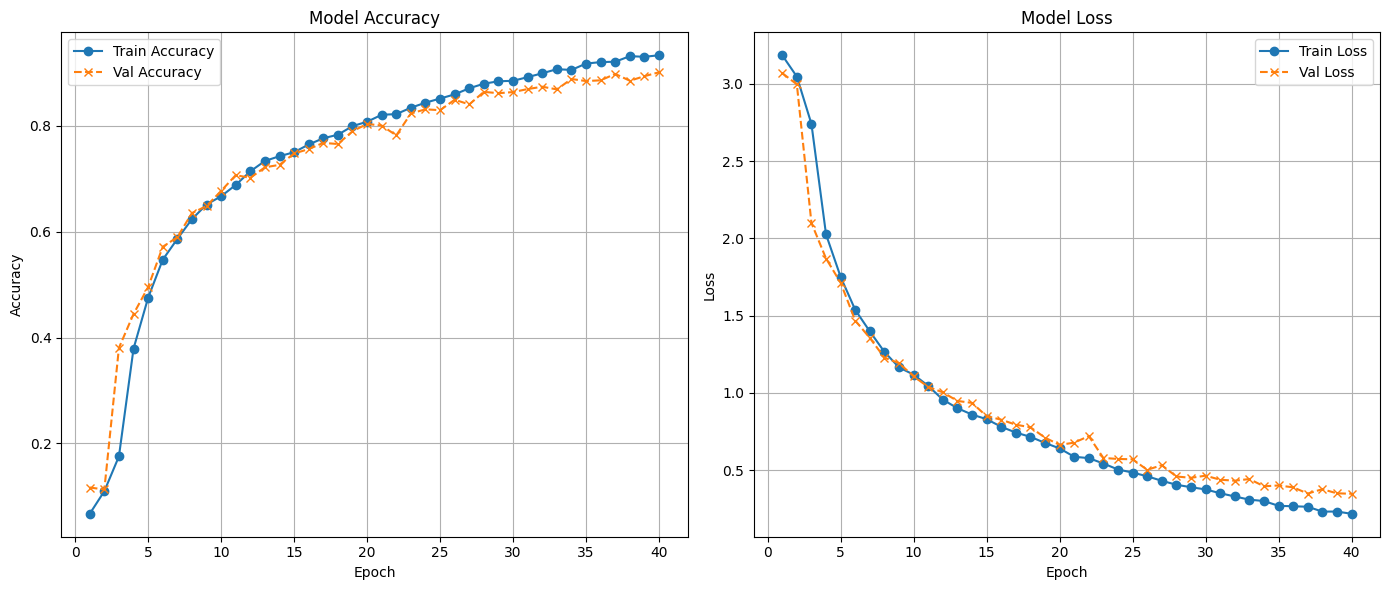

In [ ]:
Accuracy.acc_det("Data 1 Accuracy.csv","Data 1 Accuracy.png")